My project

In [27]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

In [28]:
d=pd.read_table('airf.txt',skiprows=1,parse_dates=[0],names=['Date','Rainfall'],delim_whitespace=True,keep_date_col=True)

In [29]:
d.head()

,Date,Rainfall
0,1901-01-01,5.29
1,1901-01-02,1.81
2,1901-01-03,1.11
3,1901-01-04,1.89
4,1901-01-05,1.19


In [30]:
d.info

<bound method DataFrame.info of             Date  Rainfall
0     1901-01-01      5.29
1     1901-01-02      1.81
2     1901-01-03      1.11
3     1901-01-04      1.89
4     1901-01-05      1.19
5     1901-01-06      0.28
6     1901-01-07      0.27
7     1901-01-08      1.01
8     1901-01-09      1.74
9     1901-01-10      0.59
10    1901-01-11      1.38
11    1901-01-12      0.95
12    1901-01-13      2.67
13    1901-01-14      5.82
14    1901-01-15      3.84
15    1901-01-16      0.28
16    1901-01-17      0.36
17    1901-01-18      1.05
18    1901-01-19      0.74
19    1901-01-20      0.30
20    1901-01-21      0.62
21    1901-01-22      0.51
22    1901-01-23      0.07
23    1901-01-24      0.12
24    1901-01-25      0.06
25    1901-01-26      0.00
26    1901-01-27      0.01
27    1901-01-28      0.03
28    1901-01-29      0.09
29    1901-01-30      0.08
...          ...       ...
41242 2013-12-01      0.24
41243 2013-12-02      0.49
41244 2013-12-03      1.01
41245 2013-12-04      0

In [31]:
d.set_index(keys='Date', inplace=True)
d.head()

,Rainfall
Date,
1901-01-01,5.29
1901-01-02,1.81
1901-01-03,1.11
1901-01-04,1.89
1901-01-05,1.19


In [32]:
type(d.index)

pandas.core.indexes.datetimes.DatetimeIndex

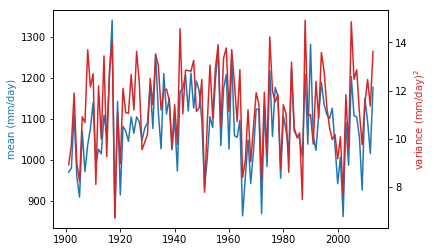

In [33]:
fig, ax = plt.subplots()
color = 'tab:blue'
ax.set_ylabel('mean (mm/day)',color=color)
ax.plot(d.groupby(d.index.year)['Rainfall'].sum())

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('variance (mm/day)$^2$', color=color)  # we already handled the x-label with ax1
ax2.plot(d.groupby(d.index.year)['Rainfall'].var(), color=color)

In [132]:
type(d.groupby(d.index.year)['Rainfall'].var())

pandas.core.series.Series

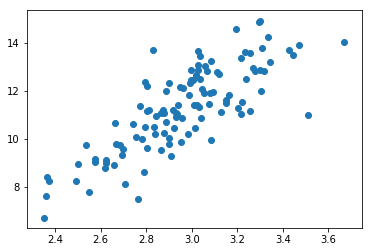

In [107]:
x = d.groupby(by=d.index.year)['Rainfall'].mean()
y = d.groupby(by=d.index.year)['Rainfall'].var()

fig, ax = plt.subplots()
plt.scatter(x, y)

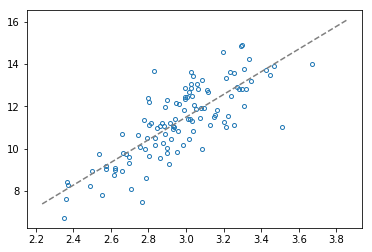

In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0.95*x.min(), 1.05*x.max(), 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.plot(x, y, linestyle='',marker='o',markersize=4,fillstyle='none')
plt.plot(xfit, yfit,color='0.5',linestyle='--');

In [139]:
x = d.groupby(by=[d.index.year,d.index.month])['Rainfall'].mean().unstack()
y = d.groupby(by=[d.index.year,d.index.month])['Rainfall'].var().unstack()
type(x)
d.resample('MS').mean()

,Rainfall
Date,
1901-01-01,1.102258
1901-02-01,1.325000
1901-03-01,0.479032
1901-04-01,1.182000
1901-05-01,1.508710
1901-06-01,3.314667
1901-07-01,7.429677
1901-08-01,8.464194
1901-09-01,3.894000


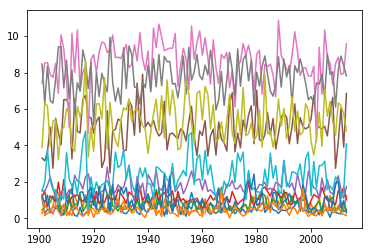

In [137]:
fig, ax = plt.subplots()
plt.plot(x)

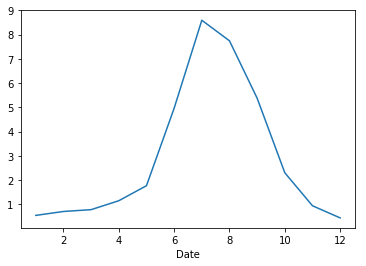

In [127]:
fig, ax = plt.subplots()
d.groupby(by=d.index.month)['Rainfall'].mean().plot(ax=ax)

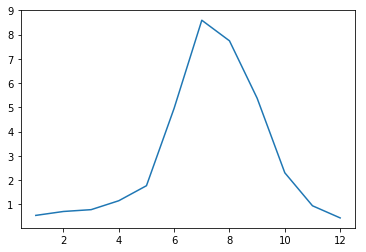

In [128]:
fig, ax = plt.subplots()
ax.plot(d.groupby(d.index.month)['Rainfall'].mean())

How to get months in x label?

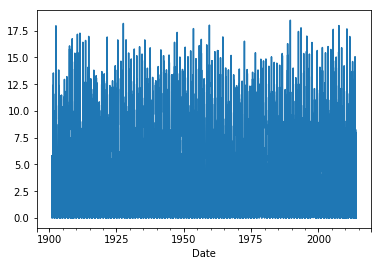

In [66]:
d.Rainfall.plot()